In [1]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv("data/congestion-measurements/raw.csv")
raw.head()

,epoch,values
0,1.512144e+09,63.86
1,1.512144e+09,66.52
2,1.512144e+09,72.09
3,1.512144e+09,85.20
4,1.512144e+09,89.08


In [3]:
mins = pd.read_csv("data/congestion-measurements/mins.csv")
mins.head()

,epoch,values
0,1.512144e+09,42.85
1,1.512145e+09,18.82
2,1.512146e+09,28.53
3,1.512147e+09,38.89
4,1.512148e+09,34.83


In [4]:
inferences = pd.read_csv("data/congestion-inferences/jd_inferences.csv")
inferences.head()

,starts,ends,congestion
0,1.512219e+09,1.512244e+09,1.0
1,1.512244e+09,1.512302e+09,0.0
2,1.512302e+09,1.512328e+09,1.0
3,1.512328e+09,1.512392e+09,0.0
4,1.512392e+09,1.512413e+09,1.0


In [5]:
def epoch2datetime(t):
    return datetime.utcfromtimestamp(t)

In [9]:
starts = inferences["starts"].map(epoch2datetime)
ends = inferences["ends"].map(epoch2datetime)

viz_congestion_dt = [None]*(len(starts) + len(ends))
viz_congestion_dt[::2] = list(starts)
viz_congestion_dt[1::2] = list(ends)

viz_congestion_inferences = np.repeat(inferences["congestion"].values, 2)

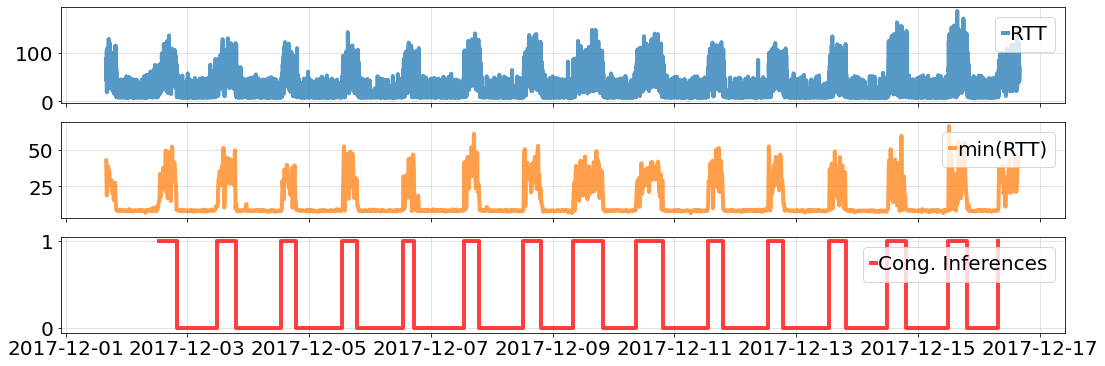

In [14]:
N = 3

fig, ax = plt.subplots(N, figsize=(18, 6), sharex=True)

for i in range(N):
    ax[i].yaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')
    ax[i].xaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')

ax[0].plot_date(
    raw["epoch"].map(epoch2datetime), 
    raw["values"],
    xdate=True, 
    ydate=False,
    label="RTT", 
    tz="UTC", 
    alpha=0.75, 
    lw=4,
    linestyle='solid', 
    marker='None', 
    color="C0"
)

ax[1].plot_date(
    mins["epoch"].map(epoch2datetime), 
    mins["values"],
    xdate=True, 
    ydate=False,
    label="min(RTT)", 
    tz="UTC", 
    alpha=0.75, 
    lw=4,
    linestyle='solid', 
    marker='None', 
    color="C1"
)

ax[2].plot_date(
    viz_congestion_dt,
    viz_congestion_inferences,
    xdate=True, 
    ydate=False,
    label="Cong. Inferences", 
    tz="UTC", 
    alpha=0.75, 
    lw=4,
    linestyle='solid', 
    marker='None', 
    color="red"
)


for i in range(N):
    ax[i].tick_params(labelsize=20)
    ax[i].legend(loc='upper right', ncol=1, frameon=True, fontsize=20,
                 handletextpad=0.1, columnspacing=0.1, handlelength=0.25)